#  Predicting financial risk using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting the rate of someone facing financial risk being low, medium or high based on their financial and social attributes.

We're going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. EDA
6. Preprocessing
7. Modelling
8. Experimentation

## 1. Problem Definition
Given a financial and social parameters about a person, can we predict the rate of the financial risk level that they are in.

## 2. Data
The data is taken from the kaggle website.The link: https://www.kaggle.com/datasets/preethamgouda/financial-risk/data. Please note that these data is taken from USA.

## 3. Evaluation
If we can reach 75% accuracy at predicting the financial risk rate correctly, we'll pursue the project.

## 4. Features
Describing all the features in the dataset

1. Age: The age of the individual, a continuous variable influencing financial stability.
   * Ranges from 18 years to 69 years
2. Gender: Gender of the individual
   * Male
   * Female
   * Non-binary
3. Education level: Highest level of education achieved
   * Bachelor's
   * High school
   * PhD
4. Marital status: Current marital status
   * Widowed
   * divorced
   * single
   * married
5. Income: Ranges from 20k to 120k in USD
6. Credit score: Numeric value indicating creditworthiness ranges from 600 to 799
7. Loan Amount: The amount of loan requested by the individual. Ranges from 5k to 50k in USD
8. Loan purpose: The purpose of the loan, categorized into
   * Home
   * Auto
   * Personal
   * Business
9. Employment Status: Employment situation of the individual, including
   * Employed
   * Unemployed
   * Self-employed
10. Years at current job: Duration of employment at the current job, reflecting job stability.  Ranges from 0 to 19
13. Payment history: Historical payment performance, categorized into
    * Excellent
    * Good
    * Fair
    * Poor.
15. Debt-to-Income Ratio: Ratio of debt to income, indicating financial leverage and risk. Ranges from 0.1 to 0.6
16. Assets value: Total value of assets owned by the individual. Ranges from 20.1k to 300k in USD
17. Number of dependents: Dependents supported by the individual, affecting financial responsibilities. Rnages from 0 to 4.
18. City: City where the individual resides, providing geographic context.
19. State: State where the individual resides, giving further geographic detail.
20. Country: Country of residence, adding a global perspective
21. Previous defaults: Number of previous loan defaults, indicating historical financial risk. Ranges from 0 to 4
22. Marital Status change: Number of changes in marital status, reflecting personal life changes. Rnages from 0 to 2
23. Risk rating: Target column categorizing financial risk into
    * Low
    * Medium
    * High

### Preparing the tools

In [1]:
#EDA(exploring data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the data

In [2]:
dataset = pd.read_csv("financial_risk_assessment.csv")
dataset.head()

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,25,Male,Bachelor's,Widowed,NaN,796.0,26214.0,Personal,Employed,13,Good,0.176125,82186.0,2.0,North Hollyfort,NJ,Ireland,0.0,2,Low
1,64,Non-binary,High School,Divorced,85573.0,667.0,14241.0,Business,Employed,16,Fair,0.323489,230858.0,0.0,East Angelaburgh,AS,British Virgin Islands,1.0,1,Medium
2,37,Female,High School,Widowed,51979.0,NaN,NaN,Home,Employed,2,Fair,0.271581,197984.0,NaN,South Kevin,MH,France,4.0,0,High
3,59,Female,PhD,Divorced,95653.0,647.0,47580.0,Auto,Unemployed,3,Poor,0.133509,226984.0,3.0,Lamshire,KS,Mauritania,NaN,2,High
4,46,Male,Bachelor's,Single,NaN,NaN,NaN,Auto,Unemployed,0,Excellent,0.130810,67633.0,1.0,Chavezberg,MT,Northern Mariana Islands,1.0,2,High


### 5. Data Exploration (EDA)

In [3]:
# Check the number of rows and columns inthe dataset
dataset.shape

(4700, 20)

In [4]:
# Check the data types
dataset.dtypes

Age                        int64
Gender                    object
Education Level           object
Marital Status            object
Income                   float64
Credit Score             float64
Loan Amount              float64
Loan Purpose              object
Employment Status         object
Years at Current Job       int64
Payment History           object
Debt-to-Income Ratio     float64
Assets Value             float64
Number of Dependents     float64
City                      object
State                     object
Country                   object
Previous Defaults        float64
Marital Status Change      int64
Risk Rating               object
dtype: object

In [5]:
# Check whether there are any missing values
dataset.isna().sum()

Age                        0
Gender                     0
Education Level            0
Marital Status             0
Income                   735
Credit Score             695
Loan Amount              745
Loan Purpose               0
Employment Status          0
Years at Current Job       0
Payment History            0
Debt-to-Income Ratio       0
Assets Value             691
Number of Dependents     721
City                       0
State                      0
Country                    0
Previous Defaults        707
Marital Status Change      0
Risk Rating                0
dtype: int64

We will be dealing with the null values in the data preprocessing

In [6]:
# get more details about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    4700 non-null   int64  
 1   Gender                 4700 non-null   object 
 2   Education Level        4700 non-null   object 
 3   Marital Status         4700 non-null   object 
 4   Income                 3965 non-null   float64
 5   Credit Score           4005 non-null   float64
 6   Loan Amount            3955 non-null   float64
 7   Loan Purpose           4700 non-null   object 
 8   Employment Status      4700 non-null   object 
 9   Years at Current Job   4700 non-null   int64  
 10  Payment History        4700 non-null   object 
 11  Debt-to-Income Ratio   4700 non-null   float64
 12  Assets Value           4009 non-null   float64
 13  Number of Dependents   3979 non-null   float64
 14  City                   4700 non-null   object 
 15  Stat

In [7]:
# get more information about the numerical data
dataset.describe()

,Age,Income,Credit Score,Loan Amount,Years at Current Job,Debt-to-Income Ratio,Assets Value,Number of Dependents,Previous Defaults,Marital Status Change
count,4700.000000,3965.000000,4005.000000,3955.000000,4700.000000,4700.000000,4009.000000,3979.000000,3993.000000,4700.000000
mean,43.444468,69602.912484,698.835705,27544.586094,9.527660,0.349977,160479.851833,2.019603,1.964688,1.021489
std,14.911375,29112.792423,57.149431,12974.472718,5.788707,0.144018,80365.754374,1.414966,1.400689,0.814430
min,18.000000,20016.000000,600.000000,5001.000000,0.000000,0.100347,20055.000000,0.000000,0.000000,0.000000
25%,31.000000,44318.000000,651.000000,16387.000000,4.000000,0.223892,91365.000000,1.000000,1.000000,0.000000
50%,43.000000,68777.000000,699.000000,27829.000000,10.000000,0.351161,160511.000000,2.000000,2.000000,1.000000
75%,56.000000,95614.000000,748.000000,38773.000000,14.000000,0.476530,230133.000000,3.000000,3.000000,2.000000
max,69.000000,119958.000000,799.000000,49998.000000,19.000000,0.599809,299999.000000,4.000000,4.000000,2.000000


In [8]:
# how many of each data are there in the class column
dataset["Risk Rating"].value_counts()

Risk Rating
Low       1800
High      1500
Medium    1400
Name: count, dtype: int64

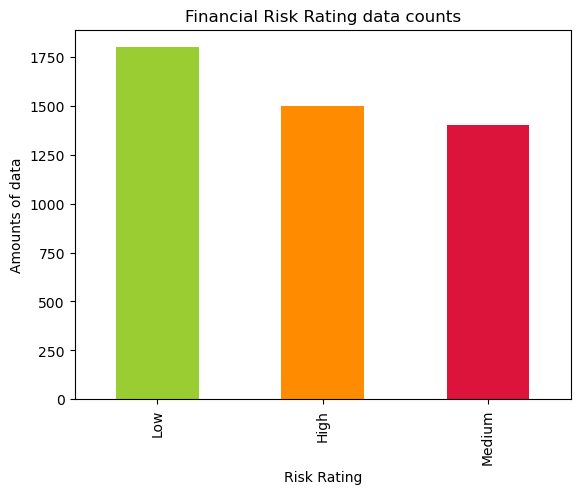

In [9]:
# visualize the value counts
dataset["Risk Rating"].value_counts().plot(kind="bar", color=["yellowgreen", "darkorange", "crimson"])
plt.title("Financial Risk Rating data counts")
plt.ylabel("Amounts of data");

There is a class imbalance that we will be delt with in the preprocessing section

### Compare risk rating vs number of dependents

In [10]:
dataset.head()

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,25,Male,Bachelor's,Widowed,NaN,796.0,26214.0,Personal,Employed,13,Good,0.176125,82186.0,2.0,North Hollyfort,NJ,Ireland,0.0,2,Low
1,64,Non-binary,High School,Divorced,85573.0,667.0,14241.0,Business,Employed,16,Fair,0.323489,230858.0,0.0,East Angelaburgh,AS,British Virgin Islands,1.0,1,Medium
2,37,Female,High School,Widowed,51979.0,NaN,NaN,Home,Employed,2,Fair,0.271581,197984.0,NaN,South Kevin,MH,France,4.0,0,High
3,59,Female,PhD,Divorced,95653.0,647.0,47580.0,Auto,Unemployed,3,Poor,0.133509,226984.0,3.0,Lamshire,KS,Mauritania,NaN,2,High
4,46,Male,Bachelor's,Single,NaN,NaN,NaN,Auto,Unemployed,0,Excellent,0.130810,67633.0,1.0,Chavezberg,MT,Northern Mariana Islands,1.0,2,High


In [11]:
pd.crosstab(dataset["Number of Dependents"], dataset["Risk Rating"])

Risk Rating,High,Low,Medium
Number of Dependents,,,
0.0,246,274,241
1.0,276,323,237
2.0,240,307,224
3.0,247,307,232
4.0,260,312,253


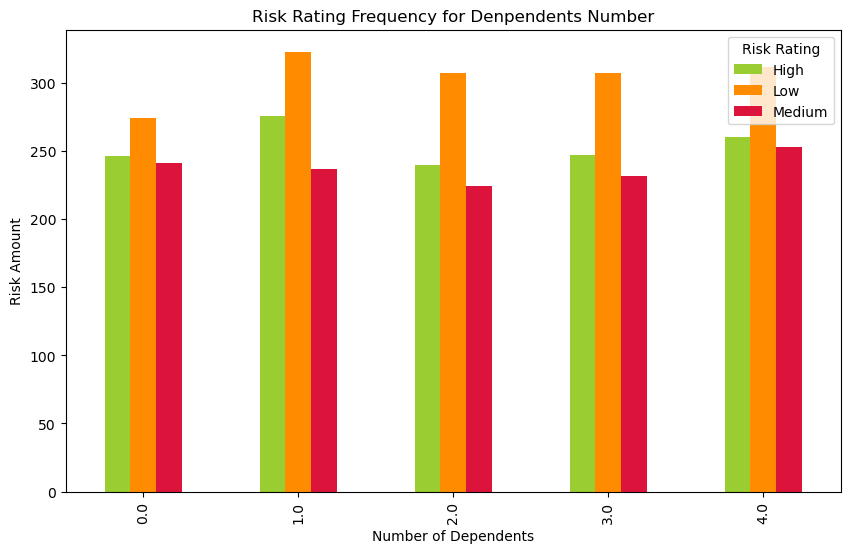

In [12]:
# Create a plot of crosstab
pd.crosstab(dataset["Number of Dependents"], dataset["Risk Rating"]).plot(kind="bar",
                                                                    figsize=(10, 6),
                                                                    color=["yellowgreen", "darkorange", "crimson"])

plt.title("Risk Rating Frequency for Denpendents Number")
plt.ylabel("Risk Amount");


### Gender Percentage

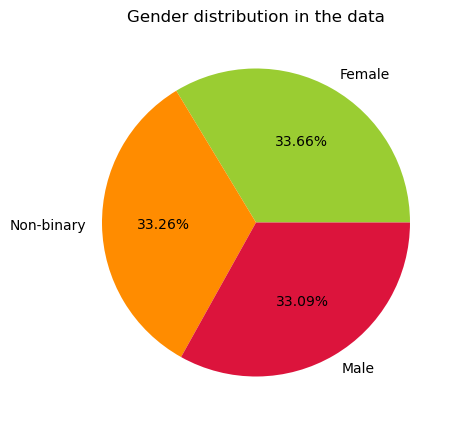

In [13]:
plt.figure(figsize=(10,5))
dataset['Gender'].value_counts().sort_values(ascending=False)\
.plot(kind='pie',
    labels=['Female','Non-binary','Male'],
    colors=["yellowgreen", "darkorange", "crimson"],
    autopct='%1.2f%%')
plt.title('Gender distribution in the data')
plt.ylabel("")
plt.show()



### Compare risk rating vs City

In [14]:
dataset.head()

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,25,Male,Bachelor's,Widowed,NaN,796.0,26214.0,Personal,Employed,13,Good,0.176125,82186.0,2.0,North Hollyfort,NJ,Ireland,0.0,2,Low
1,64,Non-binary,High School,Divorced,85573.0,667.0,14241.0,Business,Employed,16,Fair,0.323489,230858.0,0.0,East Angelaburgh,AS,British Virgin Islands,1.0,1,Medium
2,37,Female,High School,Widowed,51979.0,NaN,NaN,Home,Employed,2,Fair,0.271581,197984.0,NaN,South Kevin,MH,France,4.0,0,High
3,59,Female,PhD,Divorced,95653.0,647.0,47580.0,Auto,Unemployed,3,Poor,0.133509,226984.0,3.0,Lamshire,KS,Mauritania,NaN,2,High
4,46,Male,Bachelor's,Single,NaN,NaN,NaN,Auto,Unemployed,0,Excellent,0.130810,67633.0,1.0,Chavezberg,MT,Northern Mariana Islands,1.0,2,High


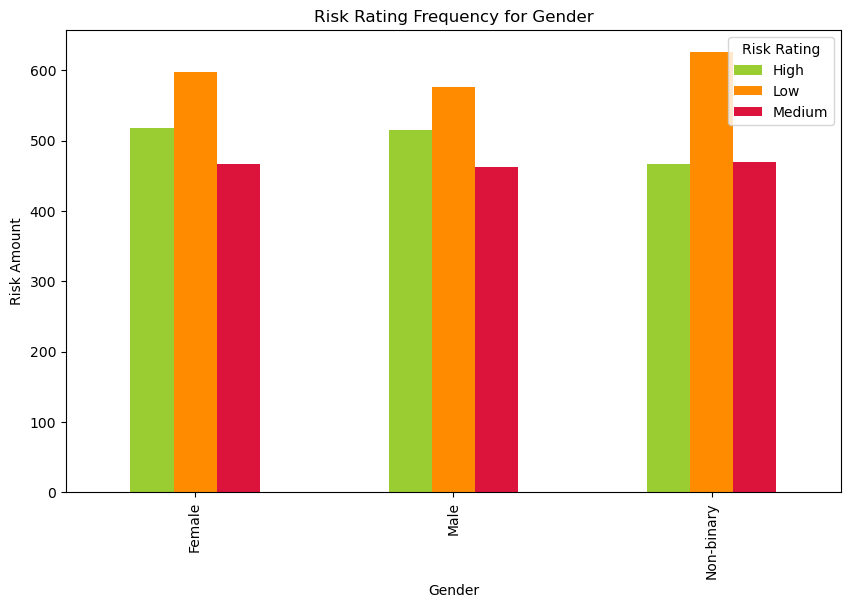

In [15]:
pd.crosstab(dataset["Gender"], dataset["Risk Rating"]).plot(kind="bar",
                                                            figsize=(10, 6),
                                                            color=["yellowgreen", "darkorange", "crimson"])

plt.title("Risk Rating Frequency for Gender")
plt.ylabel("Risk Amount");

## 6. Preprocessing

In [16]:
dataset

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,25,Male,Bachelor's,Widowed,NaN,796.0,26214.0,Personal,Employed,13,Good,0.176125,82186.0,2.0,North Hollyfort,NJ,Ireland,0.0,2,Low
1,64,Non-binary,High School,Divorced,85573.0,667.0,14241.0,Business,Employed,16,Fair,0.323489,230858.0,0.0,East Angelaburgh,AS,British Virgin Islands,1.0,1,Medium
2,37,Female,High School,Widowed,51979.0,NaN,NaN,Home,Employed,2,Fair,0.271581,197984.0,NaN,South Kevin,MH,France,4.0,0,High
3,59,Female,PhD,Divorced,95653.0,647.0,47580.0,Auto,Unemployed,3,Poor,0.133509,226984.0,3.0,Lamshire,KS,Mauritania,NaN,2,High
4,46,Male,Bachelor's,Single,NaN,NaN,NaN,Auto,Unemployed,0,Excellent,0.130810,67633.0,1.0,Chavezberg,MT,Northern Mariana Islands,1.0,2,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4695,63,Female,Master's,Married,62448.0,NaN,43759.0,Business,Employed,4,Poor,0.398517,170302.0,3.0,Pottsstad,SC,Lesotho,4.0,2,Low
4696,61,Female,High School,Divorced,31218.0,718.0,15915.0,Home,Self-employed,13,Poor,0.308266,NaN,NaN,Tiffanyborough,WI,Moldova,4.0,1,High
4697,65,Female,PhD,Married,78914.0,707.0,15559.0,Personal,Employed,7,Excellent,0.417227,62667.0,3.0,Lake Alicia,MA,Slovakia (Slovak Republic),NaN,1,Low
4698,49,Female,Bachelor's,Married,118993.0,709.0,40512.0,Home,Unemployed,18,Excellent,0.371125,193007.0,1.0,South Robertland,MD,Syrian Arab Republic,4.0,2,Low


In [17]:
#finding missing values
dataset.isnull().sum()

Age                        0
Gender                     0
Education Level            0
Marital Status             0
Income                   735
Credit Score             695
Loan Amount              745
Loan Purpose               0
Employment Status          0
Years at Current Job       0
Payment History            0
Debt-to-Income Ratio       0
Assets Value             691
Number of Dependents     721
City                       0
State                      0
Country                    0
Previous Defaults        707
Marital Status Change      0
Risk Rating                0
dtype: int64

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    4700 non-null   int64  
 1   Gender                 4700 non-null   object 
 2   Education Level        4700 non-null   object 
 3   Marital Status         4700 non-null   object 
 4   Income                 3965 non-null   float64
 5   Credit Score           4005 non-null   float64
 6   Loan Amount            3955 non-null   float64
 7   Loan Purpose           4700 non-null   object 
 8   Employment Status      4700 non-null   object 
 9   Years at Current Job   4700 non-null   int64  
 10  Payment History        4700 non-null   object 
 11  Debt-to-Income Ratio   4700 non-null   float64
 12  Assets Value           4009 non-null   float64
 13  Number of Dependents   3979 non-null   float64
 14  City                   4700 non-null   object 
 15  Stat

Replacing Missing Values

In [19]:
from sklearn.impute import KNNImputer

# Stratified median imputation
dataset['Income'] = dataset.groupby('Risk Rating')['Income'].transform(lambda x: x.fillna(x.median()))
dataset['Credit Score'] = dataset.groupby('Risk Rating')['Credit Score'].transform(lambda x: x.fillna(x.median()))
dataset['Loan Amount'] = dataset.groupby('Risk Rating')['Loan Amount'].transform(lambda x: x.fillna(x.median()))
dataset['Assets Value'] = dataset.groupby('Risk Rating')['Assets Value'].transform(lambda x: x.fillna(x.median()))
dataset['Previous Defaults'] = dataset.groupby('Risk Rating')['Previous Defaults'].transform(lambda x: x.fillna(x.median()))
dataset['Number of Dependents'].fillna(dataset['Number of Dependents'].median(), inplace=True)

#imputer = KNNImputer(n_neighbors=5)
#dataset[['Number of Dependents']] = imputer.fit_transform(dataset[['Number of Dependents']])



C:\Users\Thiyara\AppData\Local\Temp\ipykernel_1360\364582021.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Number of Dependents'].fillna(dataset['Number of Dependents'].median(), inplace=True)


In [20]:
# Check if any missing values remain
print(dataset.isnull().sum())


Age                      0
Gender                   0
Education Level          0
Marital Status           0
Income                   0
Credit Score             0
Loan Amount              0
Loan Purpose             0
Employment Status        0
Years at Current Job     0
Payment History          0
Debt-to-Income Ratio     0
Assets Value             0
Number of Dependents     0
City                     0
State                    0
Country                  0
Previous Defaults        0
Marital Status Change    0
Risk Rating              0
dtype: int64


In [21]:
dataset.shape

(4700, 20)

In [22]:
# Check for outliers
from scipy.stats import zscore

dataset_copy = dataset.copy()
numeric_columns = dataset_copy.select_dtypes(include=[np.number]).columns
dataset_copy[numeric_columns] = dataset_copy[numeric_columns].apply(zscore)
threshold = 3
outliers = dataset_copy[(np.abs(dataset_copy[numeric_columns]) > threshold).any(axis=1)]
print(outliers.count())

Age                      0
Gender                   0
Education Level          0
Marital Status           0
Income                   0
Credit Score             0
Loan Amount              0
Loan Purpose             0
Employment Status        0
Years at Current Job     0
Payment History          0
Debt-to-Income Ratio     0
Assets Value             0
Number of Dependents     0
City                     0
State                    0
Country                  0
Previous Defaults        0
Marital Status Change    0
Risk Rating              0
dtype: int64


There are no outliers in the dataset

In [23]:
#create dependent & independent variable vectors
X = dataset.drop('Risk Rating', axis=1)
y = dataset['Risk Rating']

In [24]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

# Verify the shapes of the resulting datasets
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")


Training set shape: X_train: (3760, 19), y_train: (3760,)
Test set shape: X_test: (940, 19), y_test: (940,)


In [25]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Create the OrdinalEncoder
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Specify the categorical features
categorical_features = ['Gender', 'Education Level', 'Marital Status', 'Loan Purpose',
                        'Employment Status', 'Payment History', 'City', 'State', 'Country']

# Create the ColumnTransformer with the OrdinalEncoder
transformer = ColumnTransformer([("ordinal", ordinal_encoder, categorical_features)],
                                 remainder="passthrough")

# Fit the transformer on the training data
transformer.fit(X_train)

# Transform both training and validation data
transformed_X_train = transformer.transform(X_train)
transformed_X_test = transformer.transform(X_test)

# Optionally convert to array if needed
transformed_X_train_array = transformed_X_train  # No need for .toarray() as OrdinalEncoder outputs a dense array
print(transformed_X_train_array)

[[0. 2. 1. ... 4. 0. 1.]
 [1. 2. 1. ... 2. 0. 2.]
 [1. 3. 1. ... 4. 0. 0.]
 ...
 [0. 3. 1. ... 0. 0. 1.]
 [2. 3. 3. ... 1. 0. 0.]
 [0. 1. 1. ... 1. 3. 0.]]


In [26]:
y_train

118       High
764        Low
3482    Medium
2080      High
2874    Medium
         ...  
895        Low
2064      High
3448       Low
1975    Medium
1074      High
Name: Risk Rating, Length: 3760, dtype: object

In [27]:
X_train_column_names = X_train.columns
X_train_column_names

Index(['Age', 'Gender', 'Education Level', 'Marital Status', 'Income',
       'Credit Score', 'Loan Amount', 'Loan Purpose', 'Employment Status',
       'Years at Current Job', 'Payment History', 'Debt-to-Income Ratio',
       'Assets Value', 'Number of Dependents', 'City', 'State', 'Country',
       'Previous Defaults', 'Marital Status Change'],
      dtype='object')

In [28]:
X_train.dtypes

Age                        int64
Gender                    object
Education Level           object
Marital Status            object
Income                   float64
Credit Score             float64
Loan Amount              float64
Loan Purpose              object
Employment Status         object
Years at Current Job       int64
Payment History           object
Debt-to-Income Ratio     float64
Assets Value             float64
Number of Dependents     float64
City                      object
State                     object
Country                   object
Previous Defaults        float64
Marital Status Change      int64
dtype: object

In [29]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Encode the target variable
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)



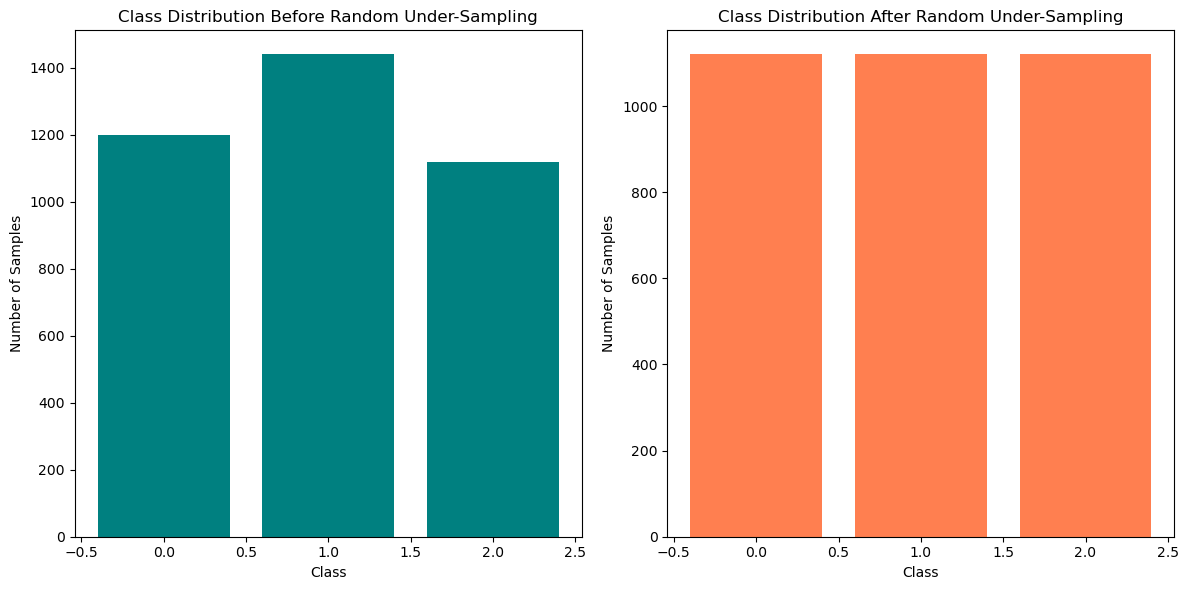

Number of samples removed by Random Under-Sampling: 400

Class distribution before Random Under-Sampling:
Class 0: 1200
Class 1: 1440
Class 2: 1120

Class distribution after Random Under-Sampling:
Class 0: 1120
Class 1: 1120
Class 2: 1120


In [30]:
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# Apply Random Under-Sampling to the encoded training data
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(transformed_X_train, y_train_encoded)

# Check class distribution before and after Random Under-Sampling
class_counts_before = Counter(y_train_encoded)
class_counts_after = Counter(y_train_resampled)

# Plot class distribution before and after Random Under-Sampling
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot class distribution before Random Under-Sampling
ax[0].bar(class_counts_before.keys(), class_counts_before.values(), color='teal')
ax[0].set_title('Class Distribution Before Random Under-Sampling')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Number of Samples')

# Plot class distribution after Random Under-Sampling
ax[1].bar(class_counts_after.keys(), class_counts_after.values(), color='coral')
ax[1].set_title('Class Distribution After Random Under-Sampling')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Number of Samples')

plt.tight_layout()
plt.show()

# Print the number of samples removed
samples_removed = sum(class_counts_before.values()) - sum(class_counts_after.values())
print(f"Number of samples removed by Random Under-Sampling: {samples_removed}")

# Print class distribution details
print("\nClass distribution before Random Under-Sampling:")
for class_label, count in class_counts_before.items():
    print(f"Class {class_label}: {count}")

print("\nClass distribution after Random Under-Sampling:")
for class_label, count in class_counts_after.items():
    print(f"Class {class_label}: {count}")


In [31]:
y_train_resampled.shape

(3360,)

In [32]:
X_train_resampled.shape

(3360, 19)

In [33]:
from sklearn.preprocessing import MaxAbsScaler

# Initialize MaxAbsScaler
scaler = MaxAbsScaler()

# Scale the resampled training data and the test data
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(transformed_X_test)



In [34]:
X_train = X_train_resampled_scaled
X_test = X_test_scaled

y_train = y_train_resampled
y_test = y_test_encoded

In [35]:
y_train, y_train.shape

(array([0, 0, 0, ..., 2, 2, 2]), (3360,))

In [36]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (3360, 19)
X_test shape:  (940, 19)
y_train shape:  (3360,)
y_test shape:  (940,)


In [37]:
len(X_train_column_names)

19

In [38]:
## feature selection
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X_train, y_train)

# Assuming X_train started as a DataFrame, you can convert it back
X_train_df = pd.DataFrame(X_train, columns=X_train_column_names)  # Replace with your original column names

mi_df = pd.DataFrame({'Feature': X_train_df.columns, 'MI Score': mi_scores})
selected_features = mi_df[mi_df['MI Score'] > 0.1]

Text(0, 0.5, 'MI Score')

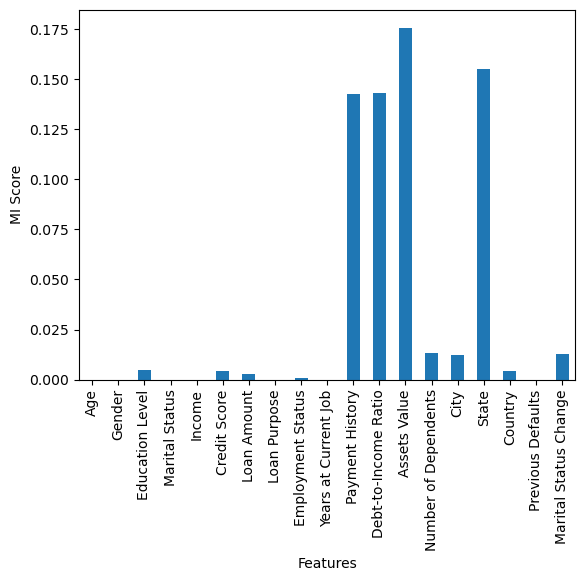

In [39]:
mi_df.set_index('Feature').plot(kind='bar', legend=False)

plt.xlabel("Features")
plt.ylabel("MI Score")

In [40]:
np.unique(y_train)

array([0, 1, 2])

In [41]:
X_train.shape, type(X_train)

((3360, 19), numpy.ndarray)

In [42]:
X_test_df = pd.DataFrame(X_test, columns=X_train_column_names)    # Convert to DataFrame

# Use feature names from the selected_features
X_train_selection = X_train_df[selected_features['Feature']]
X_test_selection = X_test_df[selected_features['Feature']]

Now the class imbalance, categorical value encoding and numerical value scaling has been complete. Let's go to model building

### 7. Modeling

### XGBoost Model

In [43]:
#!pip install xgboost

In [44]:
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model on the resampled and scaled training data
xgb_model.fit(X_train, y_train)

# Make predictions on the training and test sets
y_pred_train = xgb_model.predict(X_train)  # Predictions on training set
y_pred_test = xgb_model.predict(X_test)  # Predictions on test set



D:\Softwares\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:10:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Evaluation 

Training Accuracy: 1.0
Test Accuracy: 0.6606382978723404
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.72      0.59      0.65       300
           1       0.69      0.71      0.70       360
           2       0.58      0.68      0.62       280

    accuracy                           0.66       940
   macro avg       0.66      0.66      0.66       940
weighted avg       0.67      0.66      0.66       940


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1120
           1       1.00      1.00      1.00      1120
           2       1.00      1.00      1.00      1120

    accuracy                           1.00      3360
   macro avg       1.00      1.00      1.00      3360
weighted avg       1.00      1.00      1.00      3360

Confusion Matrix on Test Set:
[[177  53  70]
 [ 37 255  68]
 [ 32  59 189]]


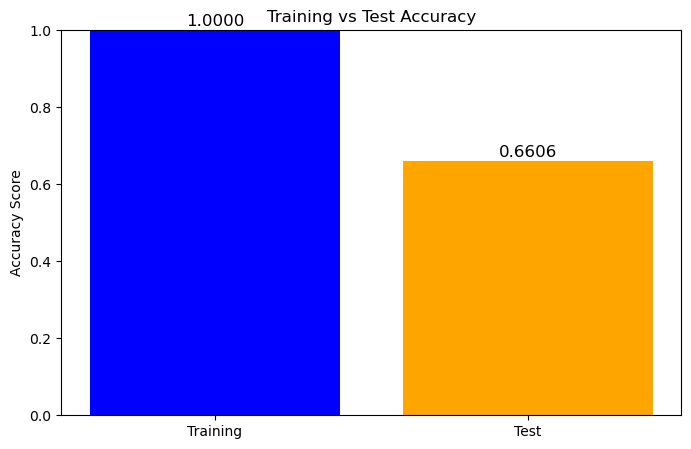

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

# Accuracy on the training set
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy}")

# Accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy}")

# Classification report on the test & training set
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred_test))

print("\nClassification Report for Training Set:")
print(classification_report(y_train, y_pred_train))

# Confusion matrix on the test set
print("Confusion Matrix on Test Set:")
print(confusion_matrix(y_test, y_pred_test))

# Define the labels and accuracies for the bar chart
labels = ['Training', 'Test']
accuracies = [train_accuracy, test_accuracy]

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Accuracy Score')
plt.title('Training vs Test Accuracy')
# Show the accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=12)
plt.show()

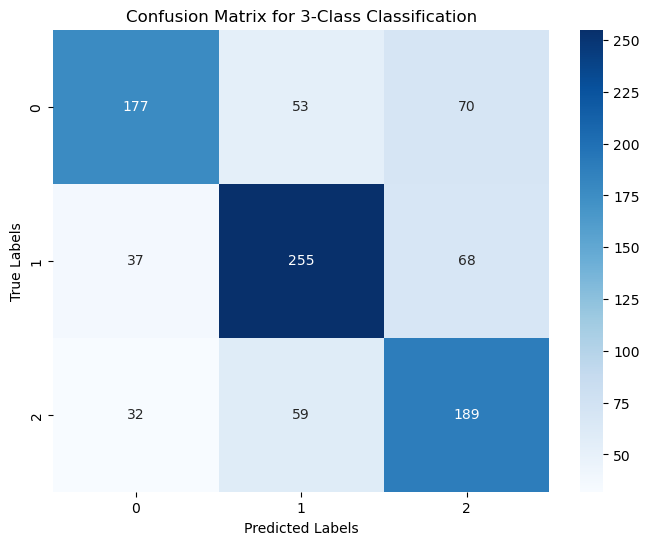

In [46]:
# Import Seaborn
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])

# Add labels, title and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for 3-Class Classification')
plt.show()

Hyper-Parameter Tuning

Fitting 8 folds for each of 10 candidates, totalling 80 fits


D:\Softwares\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:11:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'subsample': 0.6, 'reg_lambda': 2.0, 'reg_alpha': 2.0, 'n_estimators': 300, 'min_child_weight': 7, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


D:\Softwares\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:11:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Model Training Accuracy: 0.8145833333333333
Best Model Test Accuracy: 0.6702127659574468
Classification Report on Test Set (Best Model):
              precision    recall  f1-score   support

           0       0.68      0.65      0.66       300
           1       0.75      0.65      0.69       360
           2       0.59      0.72      0.65       280

    accuracy                           0.67       940
   macro avg       0.67      0.67      0.67       940
weighted avg       0.68      0.67      0.67       940


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1120
           1       1.00      1.00      1.00      1120
           2       1.00      1.00      1.00      1120

    accuracy                           1.00      3360
   macro avg       1.00      1.00      1.00      3360
weighted avg       1.00      1.00      1.00      3360

Confusion Matrix on Test Set (Best Model):
[[194  43  6

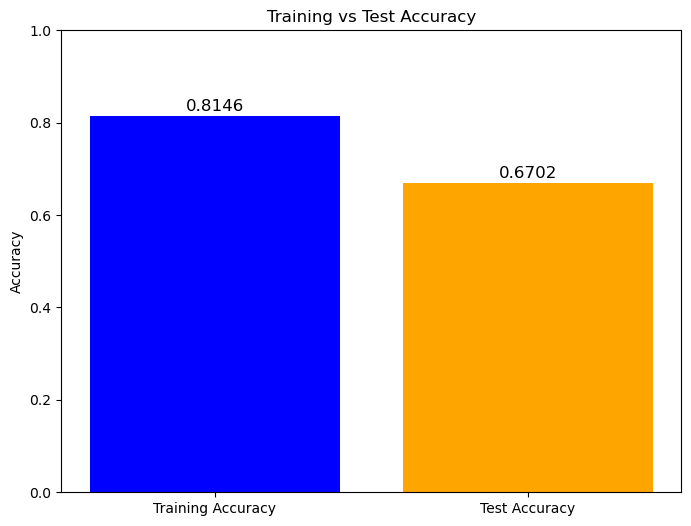

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define a smaller parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],        
    'max_depth': [3, 4],                    
    'learning_rate': [0.01, 0.05],          
    'subsample': [0.6, 0.8],                
    'colsample_bytree': [0.6, 0.8],         
    'min_child_weight': [5, 7],             
    'reg_lambda': [2.0, 3.0, 4.0],          # Increasing L2 regularization
    'reg_alpha': [1.0, 2.0]                 # Increasing L1 regularization
}


# Initialize the XGBoost model (no early stopping)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, objective='multi:softmax')

# Initialize RandomizedSearchCV with fewer iterations
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, 
                                   n_iter=10, cv=8, scoring='accuracy', random_state=42, verbose=1, n_jobs=-1)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters from RandomizedSearchCV
best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model with the best parameters
best_xbg_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='mlogloss', random_state=42, objective='multi:softmax')

# Train the model on the resampled and scaled training data
best_xbg_model.fit(X_train, y_train)

# Make predictions using the best model
y_pred_train_best = best_xbg_model .predict(X_train)
y_pred_test_best = best_xbg_model .predict(X_test)

# Evaluate the best model
train_accuracy_best = accuracy_score(y_train, y_pred_train_best)
test_accuracy_best = accuracy_score(y_test, y_pred_test_best)

print(f"Best Model Training Accuracy: {train_accuracy_best}")
print(f"Best Model Test Accuracy: {test_accuracy_best}")

# Classification report and confusion matrix for the best model
print("Classification Report on Test Set (Best Model):")
print(classification_report(y_test, y_pred_test_best))

print("\nClassification Report for Training Set:")
print(classification_report(y_train, y_pred_train))

print("Confusion Matrix on Test Set (Best Model):")
print(confusion_matrix(y_test, y_pred_test_best))

# Accuracy values
accuracies = [train_accuracy_best, test_accuracy_best]
labels = ['Training Accuracy', 'Test Accuracy']

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.title('Training vs Test Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  

# Show the accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=12)
plt.show()

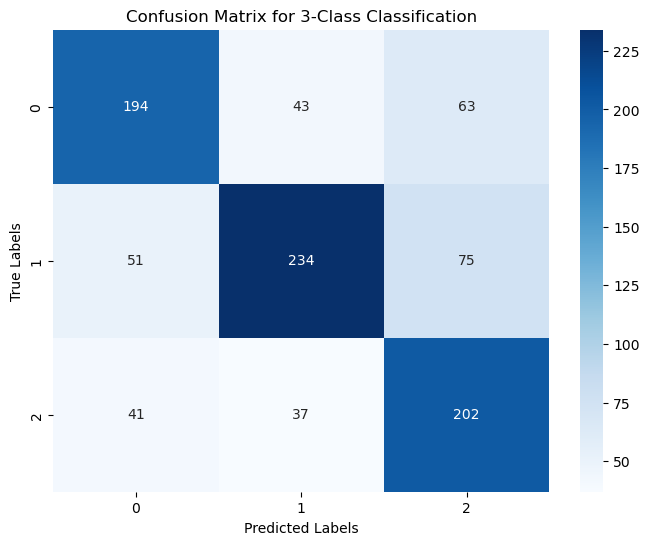

In [48]:
# Import Seaborn
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_test_best)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])

# Add labels, title and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for 3-Class Classification')
plt.show()

### CatBoost Model

In [49]:
#!pip install catboost

In [50]:
from catboost import CatBoostClassifier

# Initialize the CatBoost model
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, random_seed=42, verbose=100)

# Train the model on the resampled and scaled training data
catboost_model.fit(X_train, y_train)

# Make predictions on the training and test sets
y_pred_train = catboost_model.predict(X_train)
y_pred_test = catboost_model.predict(X_test)


0:	learn: 1.0765736	total: 179ms	remaining: 2m 59s
100:	learn: 0.6356946	total: 1.44s	remaining: 12.8s
200:	learn: 0.4983685	total: 2.65s	remaining: 10.5s
300:	learn: 0.4066013	total: 3.85s	remaining: 8.93s
400:	learn: 0.3361482	total: 5.11s	remaining: 7.63s
500:	learn: 0.2808093	total: 6.32s	remaining: 6.29s
600:	learn: 0.2369152	total: 7.59s	remaining: 5.04s
700:	learn: 0.2019905	total: 8.75s	remaining: 3.73s
800:	learn: 0.1726302	total: 9.94s	remaining: 2.47s
900:	learn: 0.1492847	total: 11.1s	remaining: 1.22s
999:	learn: 0.1308129	total: 12.3s	remaining: 0us


CatBoost model Evaluation

Training Accuracy: 0.999702380952381
Test Accuracy: 0.6510638297872341
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.66      0.61      0.63       300
           1       0.72      0.66      0.69       360
           2       0.58      0.69      0.63       280

    accuracy                           0.65       940
   macro avg       0.65      0.65      0.65       940
weighted avg       0.66      0.65      0.65       940


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1120
           1       1.00      1.00      1.00      1120
           2       1.00      1.00      1.00      1120

    accuracy                           1.00      3360
   macro avg       1.00      1.00      1.00      3360
weighted avg       1.00      1.00      1.00      3360

Confusion Matrix on Test Set:
[[182  47  71]
 [ 52 238  70]
 [ 43  45 192]]


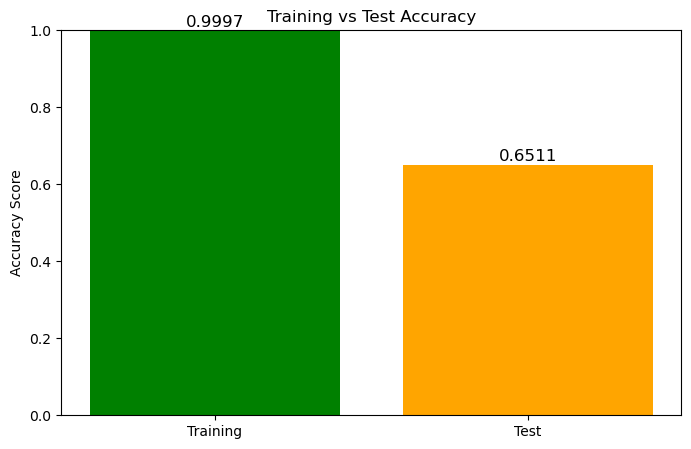

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

# Accuracy on the training set
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy}")

# Accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy}")

# Classification report on the test & training set
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred_test))

print("\nClassification Report for Training Set:")
print(classification_report(y_train, y_pred_train))

# Confusion matrix on the test set
print("Confusion Matrix on Test Set:")
print(confusion_matrix(y_test, y_pred_test))

# Define the labels and accuracies for the bar chart
labels = ['Training', 'Test']
accuracies = [train_accuracy, test_accuracy]

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['green', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Accuracy Score')
plt.title('Training vs Test Accuracy')
# Show the accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=12)
plt.show()

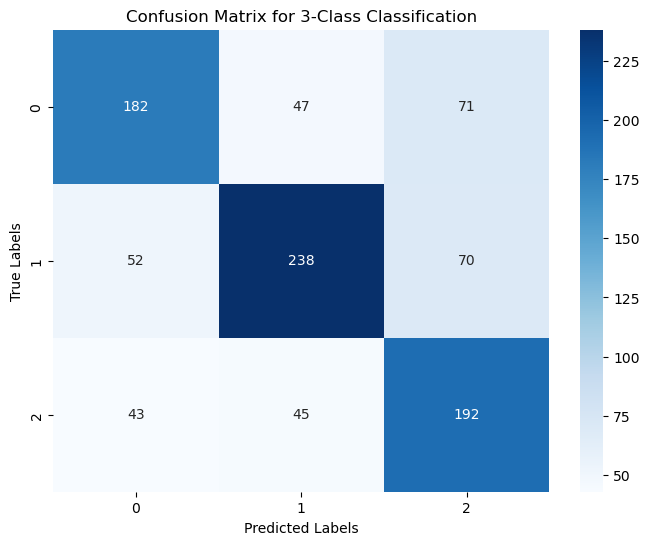

In [52]:
# Import Seaborn
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])

# Add labels, title and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for 3-Class Classification')
plt.show()

To get more Testing Accuracy let's do hyper parameter tuning

Fitting 10 folds for each of 10 candidates, totalling 100 fits
0:	learn: 1.0800090	total: 10.4ms	remaining: 2.06s
100:	learn: 0.6665182	total: 1.16s	remaining: 1.14s
199:	learn: 0.5424477	total: 2.17s	remaining: 0us
Best Parameters: {'learning_rate': 0.1, 'l2_leaf_reg': 7, 'iterations': 200, 'depth': 6, 'border_count': 128}
Best Model Training Accuracy: 0.8851190476190476
Best Model Test Accuracy: 0.6648936170212766
Classification Report on Test Set (Best Model):
              precision    recall  f1-score   support

           0       0.68      0.63      0.65       300
           1       0.72      0.68      0.70       360
           2       0.60      0.69      0.64       280

    accuracy                           0.66       940
   macro avg       0.66      0.66      0.66       940
weighted avg       0.67      0.66      0.67       940


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1120
 

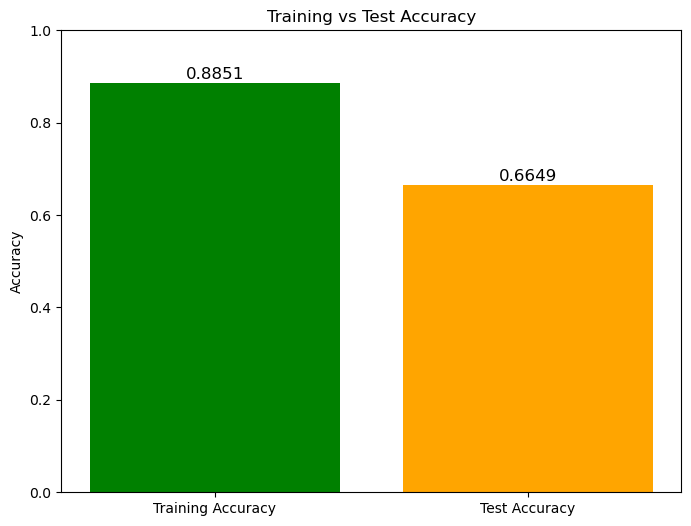

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

# Define the parameter grid
param_dist = {
    'iterations': [200,100],         # Number of trees
    'depth': [4, 6, 8],                     # Depth of trees
    'learning_rate': [0.01, 0.05, 0.1],     # Learning rate
    'l2_leaf_reg': [5, 7, 10],            # L2 regularization term
    'border_count': [32, 64, 128]           # Number of splits for numerical features
}

# Initialize the CatBoost model
catboost_model = CatBoostClassifier(random_seed=42, verbose=100)

# Initialize RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=catboost_model, param_distributions=param_dist, 
                                   n_iter=10, cv=10, scoring='accuracy', random_state=42, verbose=1, n_jobs=-1)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters from RandomizedSearchCV
best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model with the best parameters
best_model = random_search.best_estimator_

# Make predictions using the best model
y_pred_train_best = best_model.predict(X_train)
y_pred_test_best = best_model.predict(X_test)

# Evaluate the best model
train_accuracy_best = accuracy_score(y_train, y_pred_train_best)
test_accuracy_best = accuracy_score(y_test, y_pred_test_best)

print(f"Best Model Training Accuracy: {train_accuracy_best}")
print(f"Best Model Test Accuracy: {test_accuracy_best}")

# Classification report and confusion matrix for the best model
print("Classification Report on Test Set (Best Model):")
print(classification_report(y_test, y_pred_test_best))

print("\nClassification Report for Training Set:")
print(classification_report(y_train, y_pred_train))

print("Confusion Matrix on Test Set (Best Model):")
print(confusion_matrix(y_test, y_pred_test_best))

# Accuracy values
accuracies = [train_accuracy_best, test_accuracy_best]
labels = ['Training Accuracy', 'Test Accuracy']

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['green', 'orange'])
plt.title('Training vs Test Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  

# Show the accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=12)

# Display the plot
plt.show()

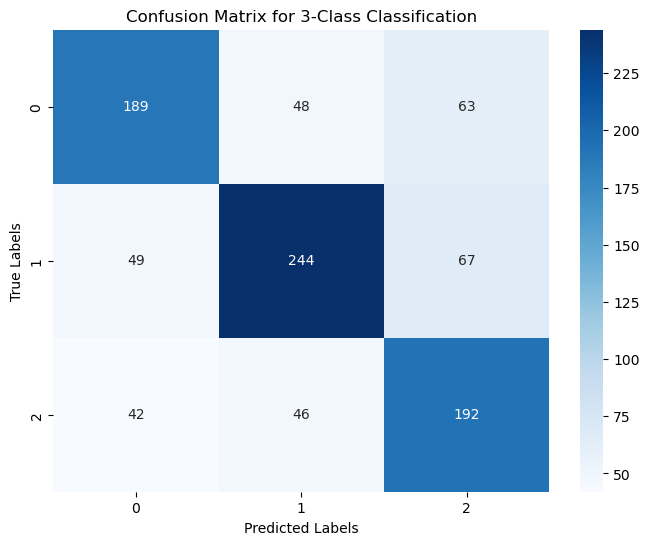

In [54]:
# Import Seaborn
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_test_best)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])

# Add labels, title and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for 3-Class Classification')
plt.show()

Random Forest Classification Model

In [55]:
# Importing the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

In [56]:
# Evaluation on training data
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))

# Evaluation on test data
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))


Training Accuracy: 1.0
Test Accuracy: 0.6340425531914894


Random Forest Classification Model Evaluation

Training Accuracy: 1.0
Test Accuracy: 0.6340425531914894

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1120
           1       1.00      1.00      1.00      1120
           2       1.00      1.00      1.00      1120

    accuracy                           1.00      3360
   macro avg       1.00      1.00      1.00      3360
weighted avg       1.00      1.00      1.00      3360


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.62      0.59      0.60       300
           1       0.72      0.65      0.68       360
           2       0.57      0.66      0.61       280

    accuracy                           0.63       940
   macro avg       0.63      0.63      0.63       940
weighted avg       0.64      0.63      0.64       940



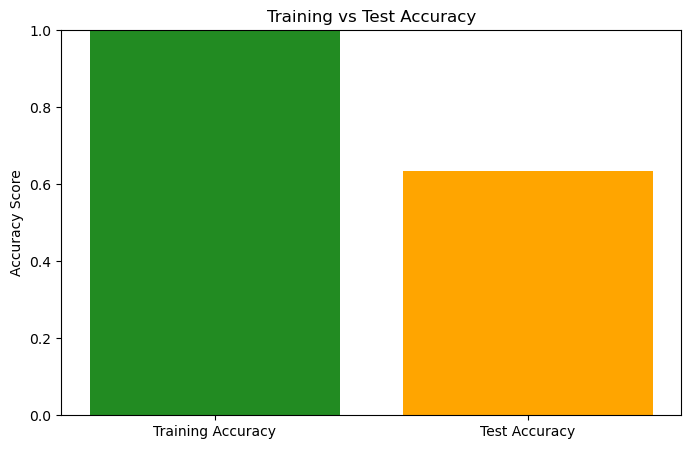

In [57]:
# Importing necessary libraries for evaluation and visualization
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Evaluate the model on training and test sets
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print the accuracy metrics
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Generate classification reports for training and test sets
print("\nClassification Report for Training Set:")
print(classification_report(y_train, y_pred_train))

print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred_test))

# Plotting the training and test accuracy
accuracies = [train_accuracy, test_accuracy]
labels = ['Training Accuracy', 'Test Accuracy']

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['forestgreen', 'orange'])
plt.ylim(0, 1)  # Set y-axis limit to [0, 1] to represent accuracy as percentage

# Add labels and title
plt.ylabel('Accuracy Score')
plt.title('Training vs Test Accuracy')

# Display the plot
plt.show()

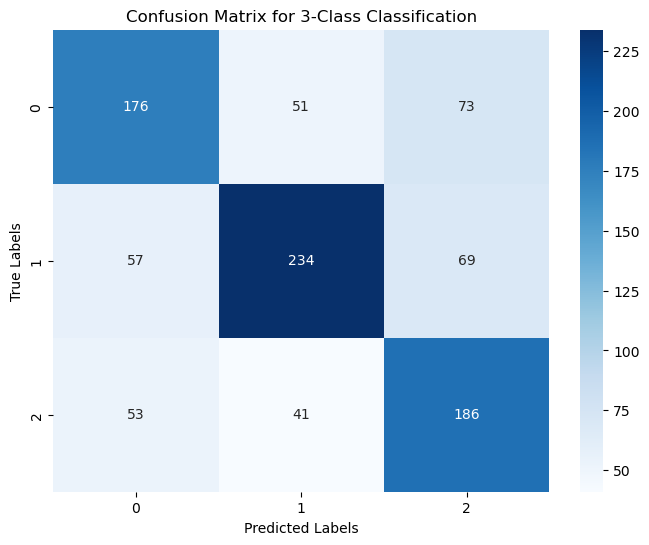

In [58]:
# Import Seaborn
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])

# Add labels, title and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for 3-Class Classification')
plt.show()

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Define a parameter grid that balances simplicity and performance
param_grid = {
    'n_estimators': [50, 100],  # Smaller number of trees to reduce complexity
    'max_depth': [None, 10, 15],  # Allow deeper trees where necessary
    'min_samples_split': [5, 10],  # Prevent overfitting by requiring more samples
    'min_samples_leaf': [2, 4],  # Prevent overfitting with larger leaf nodes
    'max_features': ['sqrt'],  # Standard choice for classification
}

# Use Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5)

# Set up GridSearchCV with StratifiedKFold
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                              cv=skf, verbose=2, n_jobs=-1)

# Perform the grid search
rf_grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", rf_grid_search.best_params_)

# Use the best model
best_rf_model = rf_grid_search.best_estimator_

# Evaluate the best model on the training and test set
y_pred_train_best = best_rf_model.predict(X_train)
y_pred_test_best = best_rf_model.predict(X_test)

# Training set evaluation
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_best))

# Test set evaluation
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_best))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Training Accuracy: 0.9916666666666667
Test Accuracy: 0.6329787234042553


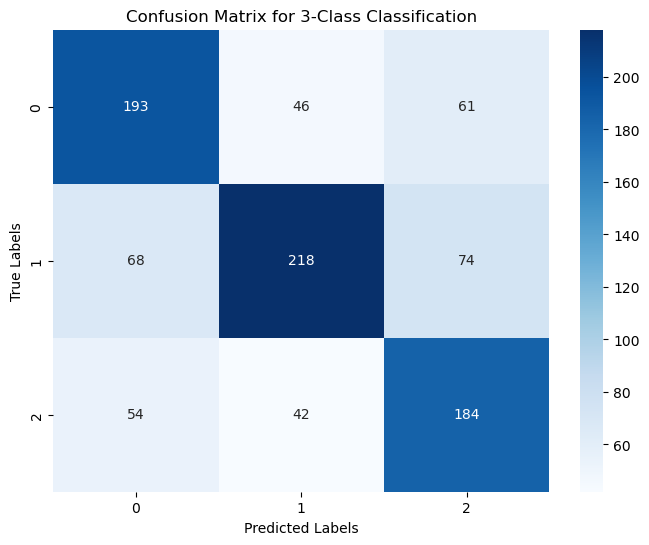

In [60]:
# Import Seaborn
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_test_best)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])

# Add labels, title and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for 3-Class Classification')
plt.show()

## LightGBM

In [61]:
#!pip install lightgbm


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 967
[LightGBM] [Info] Number of data points in the train set: 3360, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Training Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      1120
           1       0.97      0.97      0.97      1120
           2       0.97      0.98      0.97      1120

    accuracy                           0.97      3360
   macro avg       0.97      0.97      0.97      3360
weighted avg       0.97      0.97      0.97      

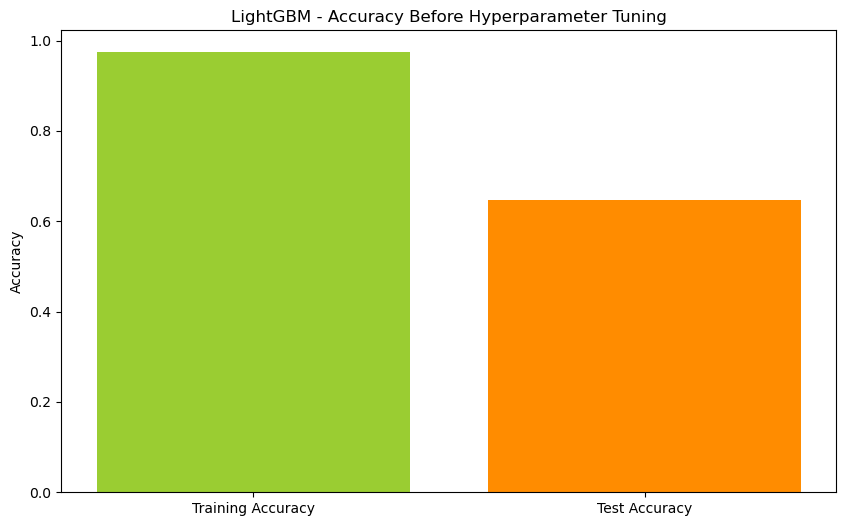

In [62]:
# Required libraries
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Training before hyperparameter tuning
model = lgb.LGBMClassifier()
model.fit(X_train_selection, y_train)

# Predict for training and test sets
y_train_pred = model.predict(X_train_selection)
y_test_pred = model.predict(X_test_selection)

# Classification report for training and test sets
print("Training Classification Report:\n", classification_report(y_train, y_train_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Accuracy Scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot training and test accuracy
plt.figure(figsize=(10, 6))
plt.bar(["Training Accuracy", "Test Accuracy"], [train_accuracy, test_accuracy], color=["yellowgreen", "darkorange"])
plt.ylabel("Accuracy")
plt.title("LightGBM - Accuracy Before Hyperparameter Tuning")
plt.show()

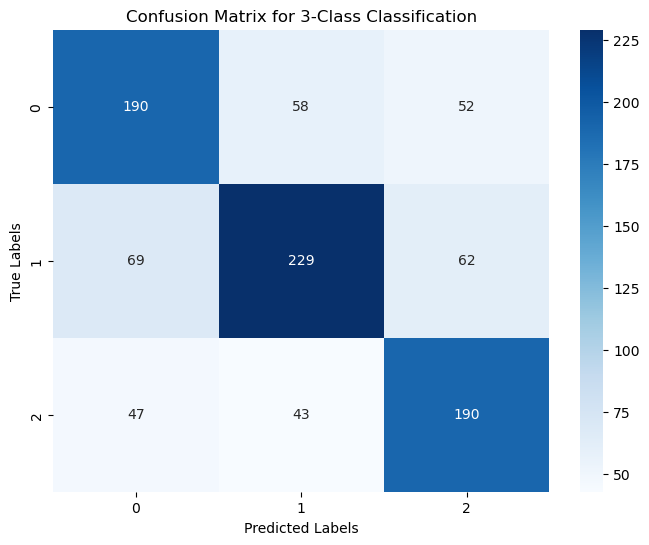

In [63]:
# Import Seaborn
import seaborn as sns
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])

# Add labels, title and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for 3-Class Classification')
plt.show()

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 967
[LightGBM] [Info] Number of data points in the train set: 3360, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Best Hyperparameters: {'subsample': 0.6, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'num_leaves': 31, 'n_estimators': 100, 'min_child_samples': 20, 'max_depth': 100, 'l

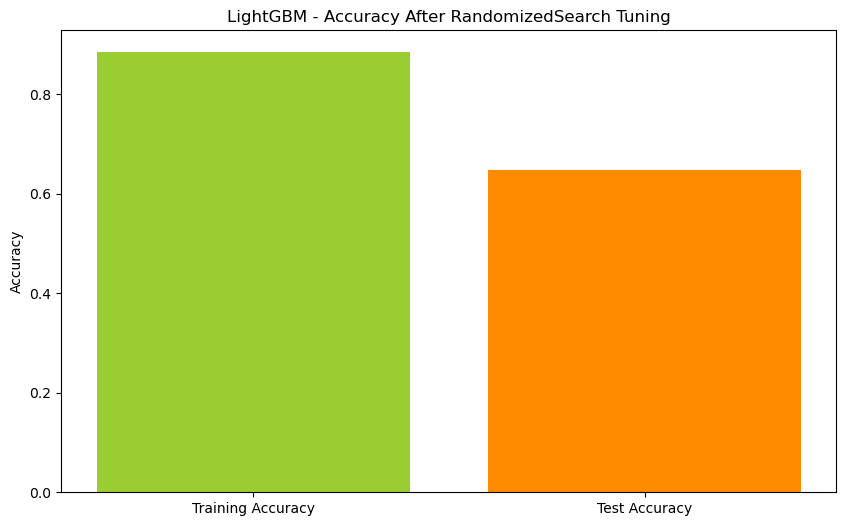

In [64]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter space for tuning
param_dist = {
    'learning_rate': [0.001, 0.005, 0.01,0.05],
    'max_depth': [15, 50, 70, 100],
    'num_leaves': [20, 31, 50, 100],
    'n_estimators': [100, 200, 300, 400,500],
    'min_child_samples': [20, 30, 40],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 1],
   'feature_fraction' : [0.1,0.5,1],
    'reg_alpha': [0, 0.01, 0.1, 1],  # L1 regularization
    'reg_lambda': [0, 0.01, 0.1, 1],  # L2 regularization
}

# Initialize the LightGBM classifier
lgbm = lgb.LGBMClassifier(objective='multiclass', random_state=42)

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(estimator=lgbm,
                                   param_distributions=param_dist,
                                   n_iter=50,  # Number of random samples to try
                                   scoring='accuracy',
                                   cv=5,  # 5-fold cross-validation
                                   verbose=1,
                                   random_state=42,
                                   n_jobs=-1)

# Fit the model with RandomizedSearchCV
random_search.fit(X_train_selection, y_train)

# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print(f"Best Hyperparameters: {best_params}")

# Predict for training and test sets using the best model
y_train_best_pred = best_model.predict(X_train_selection)
y_test_best_pred = best_model.predict(X_test_selection)

# Classification report for training and test sets after RandomizedSearchCV
print("Training Classification Report (After RandomizedSearch Tuning):\n", classification_report(y_train, y_train_best_pred))
print("Test Classification Report (After RandomizedSearch Tuning):\n", classification_report(y_test, y_test_best_pred))

# Accuracy Scores after tuning
train_accuracy_best = accuracy_score(y_train, y_train_best_pred)
test_accuracy_best = accuracy_score(y_test, y_test_best_pred)

print(f"Training Accuracy (After Tuning): {train_accuracy_best:.4f}")
print(f"Test Accuracy (After Tuning): {test_accuracy_best:.4f}")

# Plot training and test accuracy after tuning
plt.figure(figsize=(10, 6))
plt.bar(["Training Accuracy", "Test Accuracy"], [train_accuracy_best, test_accuracy_best], color=["yellowgreen", "darkorange"])
plt.ylabel("Accuracy")
plt.title("LightGBM - Accuracy After RandomizedSearch Tuning")
plt.show()

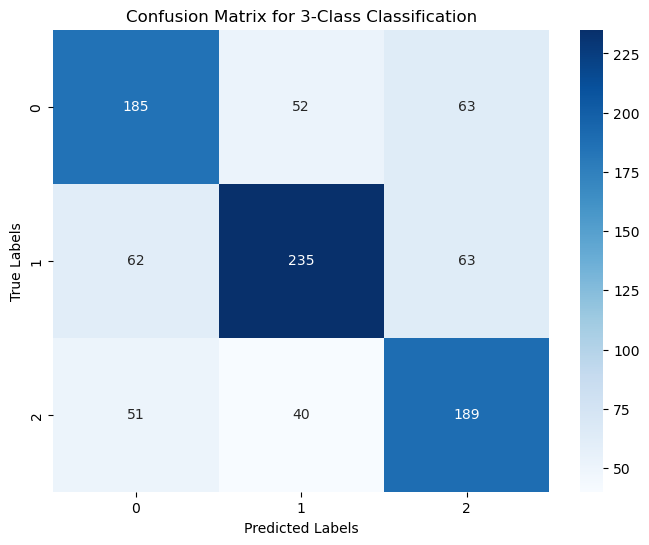

In [65]:
# Import Seaborn
import seaborn as sns
cm = confusion_matrix(y_test, y_test_best_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])

# Add labels, title and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for 3-Class Classification')
plt.show()

Comparison of the models

D:\Softwares\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:19:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


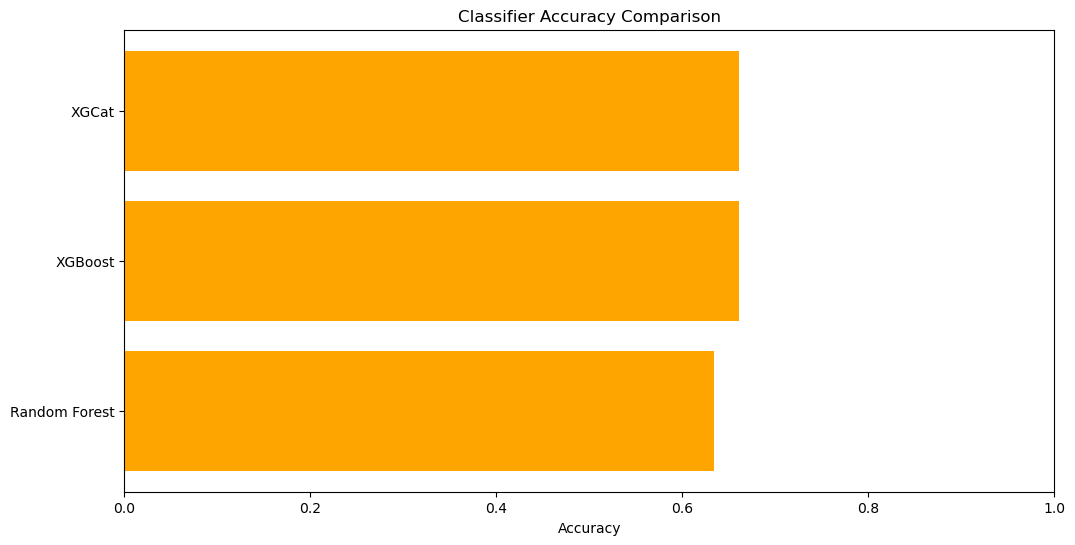

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define and initialize the classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(max_depth=None, max_features='sqrt', min_samples_leaf=2, min_samples_split=5, n_estimators=100),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'XGCat': XGBClassifier() 
}

# Train, predict, and evaluate each classifier
results = {}
for name, model in classifiers.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the result
    results[name] = accuracy

# Display the results
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])

# Filter for specific models
filtered_results_df = results_df[results_df['Model'].isin(['Random Forest', 'XGBoost', 'XGCat'])]

# Plotting the filtered results
plt.figure(figsize=(12, 6))
plt.barh(filtered_results_df['Model'], filtered_results_df['Accuracy'], color='orange')
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.xlim(0, 1)  # Setting x-axis limits to 0-1 for accuracy
plt.show()


## Importing the best model - catboost

In [1]:
# Load the LabelEncoder from the 'models' folder
#with open(os.path.join('models', 'label_encoder.pickle'), 'rb') as file:
    #loaded_encoder = pickle.load(file)

import pickle
import os

# Ensure the 'models' directory exists, if not create it
if not os.path.exists('models'):
    os.makedirs('models')

# Save the XGBoost model inside 'models' folder
with open(os.path.join('models', 'xgb_model.pickle'), 'wb') as file:
    pickle.dump(xgb_model, file)

# Save the LabelEncoder inside 'models' folder
with open(os.path.join('models', 'label_encoder.pickle'), 'wb') as file:
    pickle.dump(label_encoder, file)

In [109]:
age = int(input('Enter the age: '))
gender = input('Enter the gender: ')
Education_Level = input('Enter the Education_Level: ')
Marital_Status = input('Enter the Marital_Status: ')
income = float(input('Enter the income: '))
Credit_Score = float(input('Enter the Credit_Score: '))
Loan_Amount = float(input('Enter the Loan_amount: '))
Loan_purpose = input('Enter the Loan_purpose: ')
Employment_status = input('Enter the Employment_status: ')
years = int(input('Enter the years at current job: '))
payment_history = input('Enter the payment_history: ')
Debt_to_Income_Ratio = float(input('Enter the Debt-to-Income Ratio: '))
Assets_Value = float(input('Enter the Assets_Value: '))
Number_of_Dependents = int(input('Enter the Number_of_Dependents: '))
City = input('Enter the City: ')
State = input('Enter the State: ')
country = input('Enter the country: ')
Previous_defaults = int(input('Enter the Previous_defaults: '))
Marital_status_change = int(input('Enter the Marital_status_change: '))

Enter the age:  18
Enter the gender:  Male
Enter the Education_Level:  Bachelor's
Enter the Marital_Status:  Divorced
Enter the income:  63578
Enter the Credit_Score:  681
Enter the Loan_amount:  26888
Enter the Loan_purpose:  Business
Enter the Employment_status:  Employed
Enter the years at current job:  12
Enter the payment_history:  Fair
Enter the Debt-to-Income Ratio:  0.10
Enter the Assets_Value:  49558
Enter the Number_of_Dependents:  2
Enter the City:  North Shannonmouth
Enter the State:  IA
Enter the country:  Venezuela
Enter the Previous_defaults:  4
Enter the Marital_status_change:  0


In [110]:
import numpy as np

# Prepare your input data
input_data = [
    age,                            # Numeric
    gender,                         # Original categorical
    Education_Level,                # Original categorical
    Marital_Status,                 # Original categorical
    income,                         # Numeric
    Credit_Score,                  # Numeric
    Loan_Amount,                   # Numeric
    Loan_purpose,                  # Original categorical
    Employment_status,              # Original categorical
    years,                          # Numeric
    payment_history,                # Numeric
    Debt_to_Income_Ratio,          # Numeric
    Assets_Value,                   # Numeric
    Number_of_Dependents,           # Numeric
    City,                           # Original categorical
    State,                          # Original categorical
    country,                        # Original categorical
    Previous_defaults,              # Numeric
    Marital_status_change           # Numeric or categorical
]

# Convert input_data to DataFrame for transformation
input_df = pd.DataFrame([input_data], columns=[
    'Age', 'Gender', 'Education Level', 'Marital Status',
    'Income', 'Credit Score', 'Loan Amount', 'Loan Purpose',
    'Employment Status', 'Years at Current Job', 'Payment History',
    'Debt-to-Income Ratio', 'Assets Value', 'Number of Dependents',
    'City', 'State', 'Country', 'Previous Defaults', 'Marital Status Change'
])

# Encode the input data using the transformer
encoded_input = transformer.transform(input_df)

# Scale the encoded input data using the scaler
scaled_input = scaler.transform(encoded_input)

# Make prediction
prediction = best_xbg_model.predict(scaled_input)

# Interpret the prediction
if prediction == 2:
    print("medium")
elif prediction == 0:
    print("high")
else:
    print("low")


low
